<a href="https://colab.research.google.com/github/zainazeem41472/Rice-Leaf-Disease-Classification/blob/main/cnnexperiment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
zip_path = "/content/drive/MyDrive/Rice leaf disease.zip"

!unzip -q "$zip_path" -d /content/RiceLeafDisease

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [5]:
BASE_DIR = "/content/RiceLeafDisease"
TRAIN_DIR = BASE_DIR + "/train"
VAL_DIR = BASE_DIR + "/validation"
img_height, img_width = 224, 224
batch_size = 32

In [6]:
!ls /content


drive  RiceLeafDisease	sample_data


In [7]:
!ls /content/RiceLeafDisease


RiceLeafsDisease


In [8]:
import os
import shutil
from sklearn.model_selection import train_test_split

# IMPORTANT: point to the train folder containing class folders
BASE_DIR = "/content/RiceLeafDisease/RiceLeafsDisease/train"

WORK_DIR = "/content/RiceDataset"
TRAIN_DIR = os.path.join(WORK_DIR, "train")
VAL_DIR = os.path.join(WORK_DIR, "validation")

# Create folders
os.makedirs(TRAIN_DIR, exist_ok=True)
os.makedirs(VAL_DIR, exist_ok=True)

classes = os.listdir(BASE_DIR)

for cls in classes:
    cls_path = os.path.join(BASE_DIR, cls)
    if not os.path.isdir(cls_path):
        continue

    images = [
        img for img in os.listdir(cls_path)
        if os.path.isfile(os.path.join(cls_path, img))
    ]

    train_imgs, val_imgs = train_test_split(images, test_size=0.2, random_state=42)

    os.makedirs(os.path.join(TRAIN_DIR, cls), exist_ok=True)
    os.makedirs(os.path.join(VAL_DIR, cls), exist_ok=True)

    for img in train_imgs:
        shutil.copy(os.path.join(cls_path, img), os.path.join(TRAIN_DIR, cls, img))

    for img in val_imgs:
        shutil.copy(os.path.join(cls_path, img), os.path.join(VAL_DIR, cls, img))

print("Dataset Split Completed Successfully!")


Dataset Split Completed Successfully!


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height = 224
img_width = 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical"
)

val_gen = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical"
)


Found 1680 images belonging to 6 classes.
Found 420 images belonging to 6 classes.


In [10]:
from tensorflow.keras import layers, models

model = models.Sequential([

    # BLOCK 1
    layers.Conv2D(64, (3,3), activation="relu", padding="same", input_shape=(224,224,3)),
    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),

    # BLOCK 2
    layers.Conv2D(128, (3,3), activation="relu", padding="same"),
    layers.Conv2D(128, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),

    # BLOCK 3
    layers.Conv2D(256, (3,3), activation="relu", padding="same"),
    layers.Conv2D(256, (3,3), activation="relu", padding="same"),
    layers.Conv2D(256, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),

    # BLOCK 4
    layers.Conv2D(512, (3,3), activation="relu", padding="same"),
    layers.Conv2D(512, (3,3), activation="relu", padding="same"),
    layers.Conv2D(512, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),

    # BLOCK 5
    layers.Conv2D(512, (3,3), activation="relu", padding="same"),
    layers.Conv2D(512, (3,3), activation="relu", padding="same"),
    layers.Conv2D(512, (3,3), activation="relu", padding="same"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    # Fully Connected Layers (VGG)
    layers.Dense(4096, activation="relu"),
    layers.Dropout(0.5),

    layers.Dense(4096, activation="relu"),
    layers.Dropout(0.5),

    layers.Dense(train_gen.num_classes, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │        24,582 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,285,126 (512.26 MB)

 Trainable params: 134,285,126 (512.26 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
epochs = 100

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.1454 - loss: 1.8828 - val_accuracy: 0.1667 - val_loss: 1.7922
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 46s 855ms/step - accuracy: 0.1532 - loss: 1.7929 - val_accuracy: 0.1667 - val_loss: 1.7918
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 46s 864ms/step - accuracy: 0.1518 - loss: 1.7932 - val_accuracy: 0.1667 - val_loss: 1.7919
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 46s 862ms/step - accuracy: 0.1634 - loss: 1.7928 - val_accuracy: 0.1667 - val_loss: 1.7918
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 46s 869ms/step - accuracy: 0.1743 - loss: 1.7916 - val_accuracy: 0.1667 - val_loss: 1.7918
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 45s 853ms/step - accuracy: 0.1572 - loss: 1.7922 - val_accuracy: 0.1667 - val_loss: 1.7918
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 46s 862ms/step - accuracy: 0.1700 - loss: 1.7922 - val_accuracy: 0.1667 - val_loss: 1.7918
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 46s 869ms/step - accuracy: 0.1522 - loss: 1.7920 - va

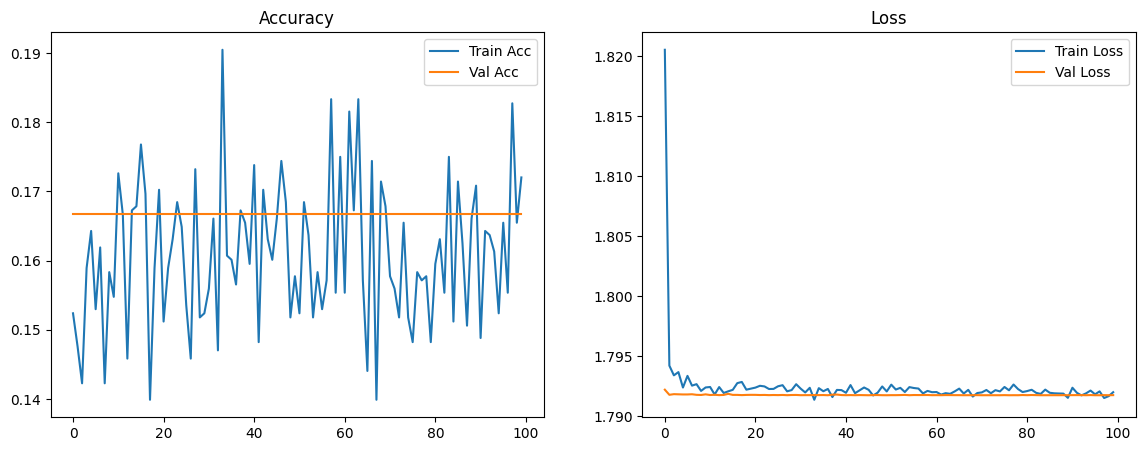

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss")
plt.legend()

plt.show()


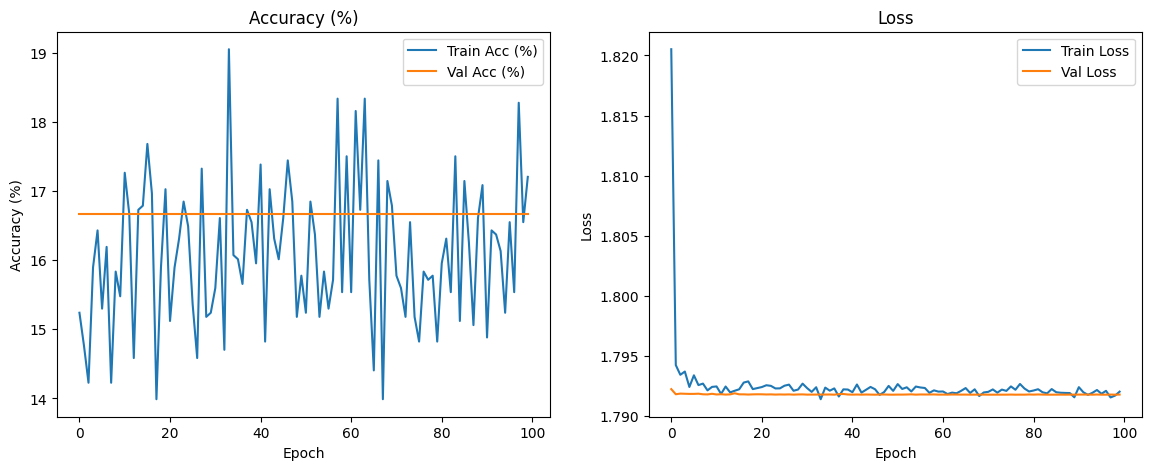

In [14]:
import matplotlib.pyplot as plt

# Convert accuracy values to percentages
train_acc = [x * 100 for x in history.history['accuracy']]
val_acc = [x * 100 for x in history.history['val_accuracy']]

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(14,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(train_acc, label="Train Acc (%)")
plt.plot(val_acc, label="Val Acc (%)")
plt.title("Accuracy (%)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Val Loss")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [15]:
final_train_acc = history.history['accuracy'][-1] * 100
final_val_acc = history.history['val_accuracy'][-1] * 100

final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"Final Training Accuracy: {final_train_acc:.2f}%")
print(f"Final Validation Accuracy: {final_val_acc:.2f}%")

print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")


Final Training Accuracy: 17.20%
Final Validation Accuracy: 16.67%
Final Training Loss: 1.7920
Final Validation Loss: 1.7918


In [13]:
model.save("vgg16_custom_rice.h5")
print("Model saved successfully!")


Model saved successfully!
